## Readme: 

In the first worksheet “Protein fold changes” you find the proteins which showed a significant change (columns AE-AI, expressed as fold change compared to sample 1).The protein information is in column AO.

- AE-AI: 
- 'Ratio 1(TMT10-126; TMT10-127N)',
- 'Ratio 11(TMT10-127C; TMT10-128N)', 
- 'Ratio 32(TMT10-128C; TMT10-129N)',
- 'Ratio 39(TMT10-129C; TMT10-130N)', 
- 'Ratio 40(TMT10-130C; TMT10-131)'

In [27]:
import pandas as pd
import seaborn as sns
import scipy

In [4]:
data=pd.read_excel("../data/raw/Copy of MP_CDR_ES16072021_TMT10plex_v01.xlsx")

In [13]:
data.columns

Index(['Protein Group', 'Protein ID', 'Accession', 'Significance', '-10lgP',
       'Intensity TMT10-126', 'Intensity TMT10-127N', 'Intensity TMT10-127C',
       'Intensity TMT10-128N', 'Intensity TMT10-128C', 'Intensity TMT10-129N',
       'Intensity TMT10-129C', 'Intensity TMT10-130N', 'Intensity TMT10-130C',
       'Intensity TMT10-131', 'Ratio TMT10-126', 'Ratio TMT10-127N',
       'Ratio TMT10-127C', 'Ratio TMT10-128N', 'Ratio TMT10-128C',
       'Ratio TMT10-129N', 'Ratio TMT10-129C', 'Ratio TMT10-130N',
       'Ratio TMT10-130C', 'Ratio TMT10-131',
       'Intensity 1(TMT10-126; TMT10-127N)',
       'Intensity 11(TMT10-127C; TMT10-128N)',
       'Intensity 32(TMT10-128C; TMT10-129N)',
       'Intensity 39(TMT10-129C; TMT10-130N)',
       'Intensity 40(TMT10-130C; TMT10-131)', 'Ratio 1(TMT10-126; TMT10-127N)',
       'Ratio 11(TMT10-127C; TMT10-128N)', 'Ratio 32(TMT10-128C; TMT10-129N)',
       'Ratio 39(TMT10-129C; TMT10-130N)', 'Ratio 40(TMT10-130C; TMT10-131)',
       'Coverag

In [7]:
data.head()

,Protein Group,Protein ID,Accession,Significance,-10lgP,Intensity TMT10-126,Intensity TMT10-127N,Intensity TMT10-127C,Intensity TMT10-128N,Intensity TMT10-128C,...,Ratio 11(TMT10-127C; TMT10-128N),Ratio 32(TMT10-128C; TMT10-129N),Ratio 39(TMT10-129C; TMT10-130N),Ratio 40(TMT10-130C; TMT10-131),Coverage (%),#Peptides,#Unique,PTM,Avg. Mass,Description
0,16,21,P19097|FAS2_YEAST,13.75,345.05,14490000,14080000,14020000,15350000,17610000,...,1.03,1.29,1.12,1.24,27,46,46,TMT10plex; Oxidation (M); Deamidation (NQ),206945,Fatty acid synthase subunit alpha OS=Saccharom...
1,9,5,P00549|KPYK1_YEAST,14.59,333.71,70790000,76000000,64730000,65390000,78940000,...,0.89,1.11,0.89,0.97,50,27,27,TMT10plex; Oxidation (M); Deamidation (NQ),54545,Pyruvate kinase 1 OS=Saccharomyces cerevisiae ...
2,17,11,P02829|HSP82_YEAST,20.10,322.57,902100,884300,1288000,912500,914700,...,1.24,1.03,1.41,1.41,12,32,6,TMT10plex; Deamidation (NQ),81406,ATP-dependent molecular chaperone HSP82 OS=Sac...
3,48,23,P19882|HSP60_YEAST,13.93,308.45,11950000,11900000,12900000,13700000,15050000,...,1.12,1.32,1.35,1.39,40,21,21,TMT10plex,60752,Heat shock protein 60 mitochondrial OS=Saccha...
4,58,28,P16861|PFKA1_YEAST,22.64,292.02,11000000,10990000,10210000,10150000,11630000,...,0.93,1.06,0.95,1.00,26,27,26,TMT10plex,107970,ATP-dependent 6-phosphofructokinase subunit al...


In [10]:
# Number of non NA values 
data.count()

Protein Group                           147
Protein ID                              147
Accession                               147
Significance                            147
-10lgP                                  147
Intensity TMT10-126                     147
Intensity TMT10-127N                    147
Intensity TMT10-127C                    147
Intensity TMT10-128N                    147
Intensity TMT10-128C                    147
Intensity TMT10-129N                    147
Intensity TMT10-129C                    147
Intensity TMT10-130N                    147
Intensity TMT10-130C                    147
Intensity TMT10-131                     147
Ratio TMT10-126                         147
Ratio TMT10-127N                        147
Ratio TMT10-127C                        147
Ratio TMT10-128N                        147
Ratio TMT10-128C                        147
Ratio TMT10-129N                        147
Ratio TMT10-129C                        147
Ratio TMT10-130N                

In [42]:
data2cluster=data[data.columns[30:35]] # combined data among replicates 
data2cluster.index=data.Accession

In [29]:
data2cluster.head()

,Ratio 1(TMT10-126; TMT10-127N),Ratio 11(TMT10-127C; TMT10-128N),Ratio 32(TMT10-128C; TMT10-129N),Ratio 39(TMT10-129C; TMT10-130N),Ratio 40(TMT10-130C; TMT10-131)
Accession,,,,,
P19097|FAS2_YEAST,1,1.03,1.29,1.12,1.24
P00549|KPYK1_YEAST,1,0.89,1.11,0.89,0.97
P02829|HSP82_YEAST,1,1.24,1.03,1.41,1.41
P19882|HSP60_YEAST,1,1.12,1.32,1.35,1.39
P16861|PFKA1_YEAST,1,0.93,1.06,0.95,1.00


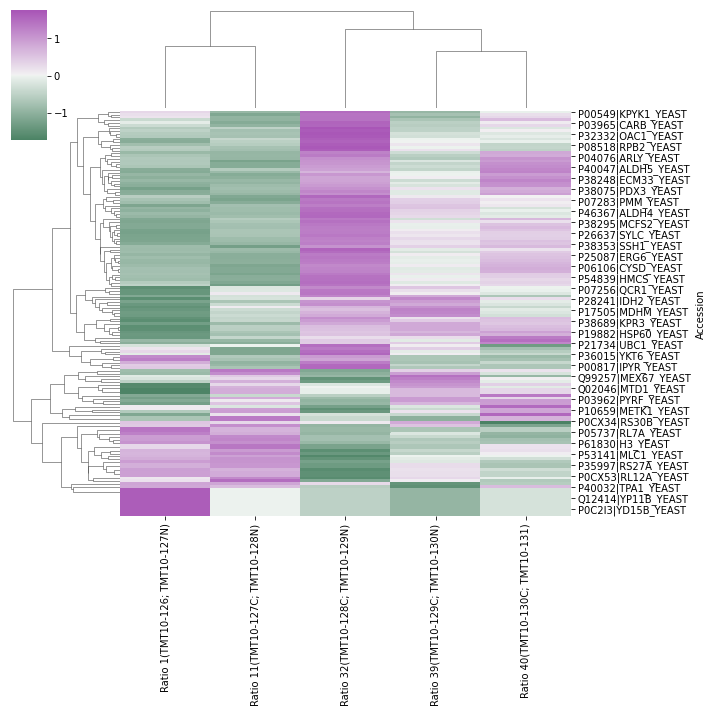

In [43]:
colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)
g=sns.clustermap(data2cluster,z_score=0,cmap=colors)

In [38]:
# To see differences among replicates
data2cluster=data[data.columns[15:25]] # combined data among replicates 
data2cluster.index=data.Accession

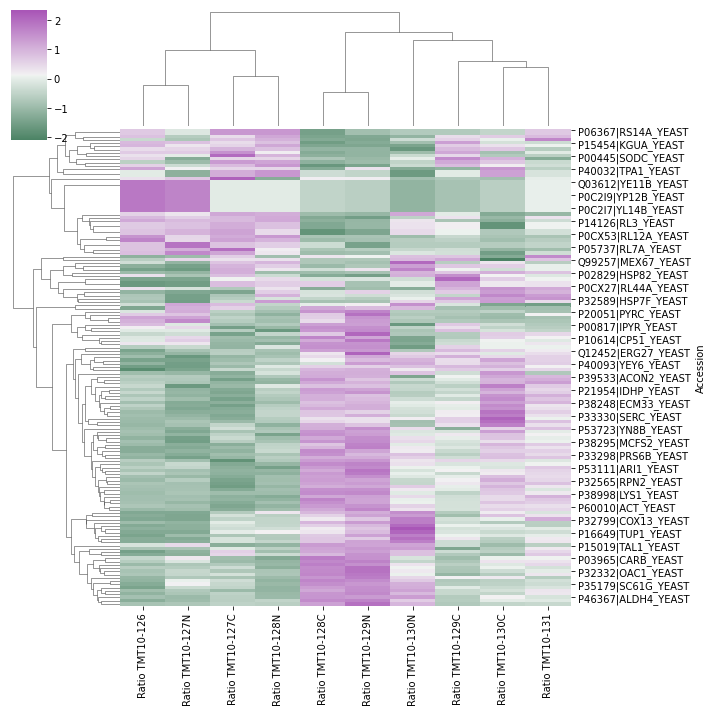

In [40]:
colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)
g=sns.clustermap(data2cluster,z_score=0,cmap=colors)